<a href="https://colab.research.google.com/github/Shivanshiie/Customer-Segmentation-/blob/main/Customer_Segmentation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**#  Customer Segmentation Engine (RFM + KMeans)

Built with synthetic customer transaction data.

In [ ]:

from google.colab import files
uploaded = files.upload()  # Upload 'synthetic_customer_transactions.csv'


Saving synthetic_customer_transactions.csv to synthetic_customer_transactions.csv


In [ ]:
#  Load the data
import pandas as pd

df = pd.read_csv("synthetic_customer_transactions.csv")
df.head()


,InvoiceNo,CustomerID,ProductID,Quantity,UnitPrice,InvoiceDate,TotalPrice
0,INV39256,CUST0328,PROD32,1,75.45,2023-02-27,75.45
1,INV14165,CUST0072,PROD55,9,13.26,2023-02-22,119.34
2,INV13478,CUST0016,PROD78,4,27.10,2023-02-17,108.40
3,INV87236,CUST0288,PROD58,9,44.85,2023-04-12,403.65
4,INV46421,CUST0143,PROD44,3,71.32,2023-01-04,213.96


In [ ]:
# Clean and Prepare Data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,CustomerID,ProductID,Quantity,UnitPrice,InvoiceDate,TotalPrice
0,INV39256,CUST0328,PROD32,1,75.45,2023-02-27,75.45
1,INV14165,CUST0072,PROD55,9,13.26,2023-02-22,119.34
2,INV13478,CUST0016,PROD78,4,27.10,2023-02-17,108.40
3,INV87236,CUST0288,PROD58,9,44.85,2023-04-12,403.65
4,INV46421,CUST0143,PROD44,3,71.32,2023-01-04,213.96


In [ ]:
#  Create RFM Table
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,CUST0001,28,11,4045.79
1,CUST0002,47,7,1024.34
2,CUST0003,13,10,3047.46
3,CUST0004,1,9,2145.81
4,CUST0005,13,9,3340.65


In [ ]:
#  Normalize the RFM Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


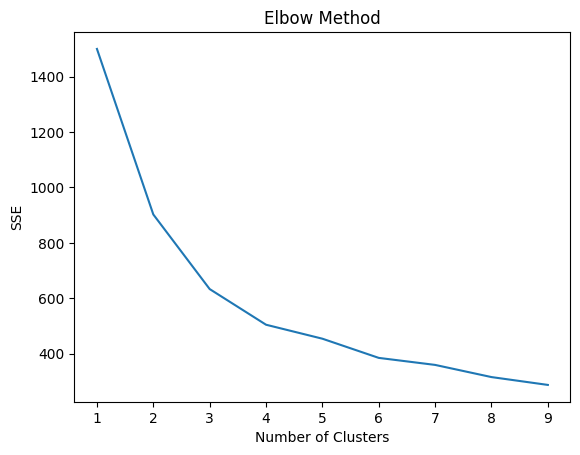

In [ ]:
#  KMeans Clustering (Elbow Method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Apply KMeans Clustering (Assume k=4 from Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,CUST0001,28,11,4045.79,2
1,CUST0002,47,7,1024.34,3
2,CUST0003,13,10,3047.46,2
3,CUST0004,1,9,2145.81,3
4,CUST0005,13,9,3340.65,2


In [ ]:
#  Analyze the Segments
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(1)


,Recency,Frequency,Monetary,CustomerID
Segment,,,,
0,21.9,14.0,4353.3,105
1,118.7,7.2,2048.8,53
2,27.7,10.5,3016.4,206
3,29.0,7.3,1846.6,136


In [ ]:
#  Export Segmented Data
rfm.to_csv("rfm_segmented_customers.csv", index=False)
from google.colab import files
files.download("rfm_segmented_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>